# Ley de decaimiento radioactivo.

**Objetivo general**
- Aproximar una solución numérica al proceso de decaimiento radioactivo usando el método de Euler.

**Objetivos particulares**
- Hacer el planteamiento en términos de un PVI.
- Comprender que el Método de Euler es condicionalmente estable.
- Implementar la solución usando el Método de Euler y controlar la estabilidad del método.

## Contenido
- [1. Decaimiento radioactivo en términos de un PVI.](#1)
    - [1.1 Definir los datos iniciales del problema.](#1-1)
    - [1.2 Definir los parámetros de para la aproximación. ](#1-2)
    - [1.3 Implementación del método de Euler. ](#1-3)
        - [Ejercicio 1. Comparación con la solución analítica.](#ej-1)
        - [Ejercicio 2. Estabilidad del método de Euler hacia adelante.](#ej-2)

<a name='1'></a>
## Decaimiento radioactivo en términos de un PVI.

Esta ley dice que  la masa de una substancia radioactiva decae a una razón que es proporcional a la cantidad de masa que está presente. 

Si $y(t)$ representa a la cantidad de substancia  en el tiempo $t$, entonces la ley de decaimiento se expresa como:
$$
\begin{eqnarray*}
\frac{d y(t)}{d t} & = & - \lambda y(t), \qquad \text{ para }  0 < t  < T_{max} \\
y(0) & = & y_0 \qquad \text{(condición inicial)}
\end{eqnarray*}
$$

donde $y_0$ representa la cantidad  de susbtancia inicial y $\lambda$ es la constante de decaimiento.

Este problema tiene la siguiente solución analítica: $y(t) = y_0 e^{-\lambda t}$.

<a name='1-1'></a>
### Definir los datos iniciales del problema.

Para este ejercicio usaremos los siguientes datos:

* Constante de decaimiento $\lambda = 1.5$.
* Intervalo de solución $t \in (a,b) = (0, 10)$.
* Condición inicial $y_0 = 20$

<a name='1-2'></a>
### Definir de los parámetros para la aproximación:

* Número de pasos de tiempo $N_t = 5$.
* Tamaño de paso: $h_t = (b−a) / N_t$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constante de decaimiento
λ = 1.5

# Intervalo de solución
a = 0.0
b = 10

# Condición inicial:
y0 = 20.0

# Número de pasos de tiempo
Nt = 5

# Paso de tiempo
ht = (b-a) / Nt

# Imprimimos los parámetros del problema
print('Parámetros del problema:\n' + '-'*24)
print('{} = {} \n(a, b) = ({},{}) \ny0 = {} \nNt = {} \nht = {}'.format(chr(955), λ,a,b,y0,Nt,ht))

Parámetros del problema:
------------------------
λ = 1.5 
(a, b) = (0.0,10) 
y0 = 20.0 
Nt = 5 
ht = 2.0


<a name='1-3'></a>
### Implementación del método de Euler.

**1.** Primero definimos un arreglo para almacenar los pasos de tiempo: $t_n = a + n ∗h_t$ para $n = 0,1,...,N_t$.

In [3]:
t = np.array([a + ht * n for n in range(0, Nt+1)])
print(' Número de pasos de tiempo: {} \n Tiempos para el cálculo: {}'.format(Nt, t))

 Número de pasos de tiempo: 5 
 Tiempos para el cálculo: [ 0.  2.  4.  6.  8. 10.]


**2.** Ahora definimos un arreglo para almacenar la solución: $y = [y_0, y_1, \dots ]$. Nótese que el primer valor de este arreglo es la condición inicial: $y(a) = y_0$. 

In [4]:
# Arreglo para almacenar la solución
y = np.zeros(Nt+1)

# Condición inicial
y[0] = y0

print('Arreglo para la solución: {}'.format(y)) 

Arreglo para la solución: [20.  0.  0.  0.  0.  0.]


**3.** Calculamos la solución con el método de Euler.

$$
\begin{eqnarray}
y(a) & = y_0 & \qquad \qquad\text{(condición inicial)}\nonumber \\
y_{n+1} & = & y_n + h_t \, f(t_n, y_n), \text{ para } n = 0,1,2, \dots, N_t - 1 \tag{1}
\end{eqnarray}
$$

Observe que en la fórmula (1) se requiere de la definición de la función $f(t, y)$, que en este caso es

$$f(t,y) = -\lambda y(t)$$



Solución : [  20.  -40.   80. -160.  320. -640.]


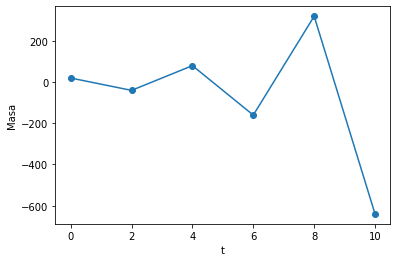

In [5]:
# Función f(t,y) = -λ y(t)
f = lambda t, y : -λ * y 

for n in range(0, Nt):
    y[n+1] = y[n] + ht * f(n * ht, y[n]) # Método de Euler hacia adelante

# Imprimimos y graficamos la solución
print('\nSolución :', y)
plt.plot(t, y, 'o-')
plt.xlabel('t')
plt.ylabel('Masa')
plt.show()

**¿Qué opina de la solución obtenida?**

<a name='ej-1'></a>
#### **<font color="SlateBlue">Ejercicio 1. Comparación con la solución analítica.</font>**

<font color="Navy">
Implementar la solución analítica $y(t) = y_0 e^{-\lambda t}$ y compararla con la solución analítica antes obtenida.

Para comprobar que tan buenos son los resultados numéricos se puede comparar la solución exacta $ye$ con la numérica $y$ y calcular el error numérico usando la norma-2 como sigue:

$$
||E||_2 = \frac{1}{N_t}\left( \sum_{i=0}^{N_t} (y_i - ye_i)^2 \right)^{1/2} 
$$

donde $y_i$ es la solución numérica y $ye_i$ la solución exacta en el paso $i$-ésimo.

1. En el siguiente código complete agregua el cálculo de la solución analítica y el cálculo del error.
2. Cambie el número de pasos de tiempo hasta que el error sea menor a $0.01$.
</font>


Error numérico : 147.73942


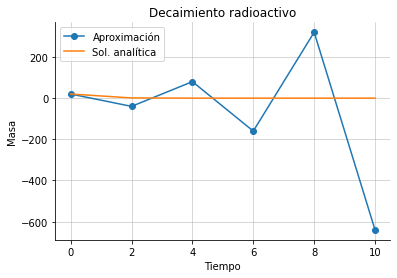

In [6]:
#
# Por claridad, repetimos todo el código para el cálculo de la solución.
#

# Número de pasos de tiempo
Nt = 5

# Paso de tiempo
ht = (b-a) / Nt

# Pasos de tiempo
t = np.array([a + ht * n for n in range(0, Nt+1)])

# Calculo de la solución analítica
# ye = ...
### BEGIN SOLUTION
ye = y0 * np.exp(-λ*t)
### END SOLUTION

# Arreglo para almacenar la solución
y = np.zeros(Nt+1)

# Condición inicial
y[0] = y0

# Función f(t,y) 
f = lambda t, y : -λ * y 

for n in range(0, Nt):
    y[n+1] = y[n] + ht * f(n * ht, y[n]) # Método de Euler hacia adelante

# Cálculo del error numérico
# error = ...
### BEGIN SOLUTION
error = np.linalg.norm(y - ye, 2) / Nt
### END SOLUTION

print('Error numérico : {:0.5f}'.format(error))

# Graficación de la aproximación y de la solución analítica.
plt.plot(t, y, 'o-', label='Aproximación')
plt.plot(t, ye, label='Sol. analítica')
plt.legend()

# Decoración del gráfico
plt.title('Decaimiento radioactivo')
plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.grid('--', lw=0.5)
ejes = plt.gca()
ejes.spines['top'].set_visible(False)
ejes.spines['right'].set_visible(False)
plt.show()

<a name='ej-2'></a>
#### **<font color="SlateBlue">Ejercicio 2. Estabilidad del Método de Euler hacia adelante.</font>**

<font color="Navy">
Ejecute la siguiente celda para obtener un interactivo que le permitirá cambiar de manera interactiva los parámetros $\lambda$ y $N_t$. Observe los cambios que se obtienen con cada valor de los parámetros.

Posteriormente complete el *quiz* **Método de Euler para la solución de un PVI** en Moodle.</font> 

In [7]:
%run "./zDecaimiento_interactive.ipynb"

interactive(children=(FloatSlider(value=1.5, description='λ', max=3.0, min=1.0), IntSlider(value=10, descripti…

<function macti_lib.MetodoEuler.euler.decaimiento(l=1.5, a=0.0, b=10, y0=20.0, Nt=10)>